### Задача

1. Смоделируйте данные о расходах 1000 клиентов за месяц по трём категориям:

* Продукты: среднее 20 000 руб., σ = 5000.

* Развлечения: среднее 10 000 руб., σ = 4000.

* Онлайн-покупки: среднее 15 000 руб., σ = 7000.

2. Используя NumPy:

* создайте матрицу 1000×3, где строки — клиенты, а столбцы — категории расходов;

* найдите общие расходы каждого клиента (сумма по строкам);

* посчитайте корреляцию между категориями расходов (np.corrcoef).

3. Дополнительно:

* выделите топ-5% клиентов по общим расходам,

* посчитайте, какой процент общих расходов банка они формируют.

4. Визуализация:

* Постройте boxplot для трёх категорий,

* Постройте scatter plot «Продукты vs Онлайн-покупки» (каждая точка — клиент).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
goods = np.random.normal(20_000, 5_000, 1000)
enter = np.random.normal(10_000, 4_000, 1000)
on_sh = np.random.normal(15_000, 7_000, 1000)

In [5]:
expenses_matrix = np.column_stack([goods, enter, on_sh])
print("\nОбщие расходы всех клиентов:", np.sum(expenses_matrix, axis=1).round(2))


Общие расходы всех клиентов: [48354.74 46995.58 42930.02 47871.67 33366.82 46896.31 56485.28 45658.24
 51465.56 52134.85 36699.57 38122.68 49126.86 26097.53 49125.59 41623.42
 35478.57 30608.66 43626.42 30960.34 54839.11 43517.96 54764.83 37283.6
 28051.67 48586.85 52000.62 56031.24 45918.49 36008.91 46611.82 40772.23
 49863.91 45838.52 54601.45 64509.35 43888.17 25781.4  39077.86 37789.17
 50565.05 41156.33 45067.86 44406.93 31159.94 52782.63 45307.55 43914.94
 50328.99 42791.5  49893.86 38587.89 38984.7  46974.99 38532.68 41235.1
 37368.15 54265.58 50668.65 49750.4  51647.21 31715.93 46796.64 31337.56
 49470.4  43223.21 22389.5  53721.02 54896.61 49643.92 53377.08 63251.26
 45748.76 49072.46 31562.78 44921.98 43519.31 50219.69 50485.72 35311.72
 42510.73 49596.98 40995.95 34642.37 38631.52 35666.39 50141.16 46564.45
 38142.29 56948.21 47486.2  51797.66 48755.7  35597.64 53243.8  36829.21
 51488.51 30809.47 37814.57 50938.25 44550.05 24997.39 45552.28 48308.3
 40300.42 54359.34 50577

In [8]:
correlation_matrix = np.corrcoef(expenses_matrix, rowvar=False)

print("\nМатрица корреляции между категориями расходов:")
print("Продукты, Развлечения, Онлайн-покупки")
print(correlation_matrix.round(4))



Матрица корреляции между категориями расходов:
Продукты, Развлечения, Онлайн-покупки
[[ 1.     -0.0404  0.0221]
 [-0.0404  1.     -0.0112]
 [ 0.0221 -0.0112  1.    ]]


In [11]:
# Топ-5% клиентов
percentile_95 = np.percentile(np.sum(expenses_matrix, axis=1), 95)
top_5_mask = np.sum(expenses_matrix, axis=1) >= percentile_95
top_5_expenses = np.sum(expenses_matrix, axis=1)[top_5_mask]

# Расчет доли расходов
total_all = np.sum(np.sum(expenses_matrix, axis=1))
total_top_5 = np.sum(top_5_expenses)
percentage = (total_top_5 / total_all) * 100

print(f"Топ-5% клиентов формируют {percentage:.1f}% общих расходов")

Топ-5% клиентов формируют 7.2% общих расходов


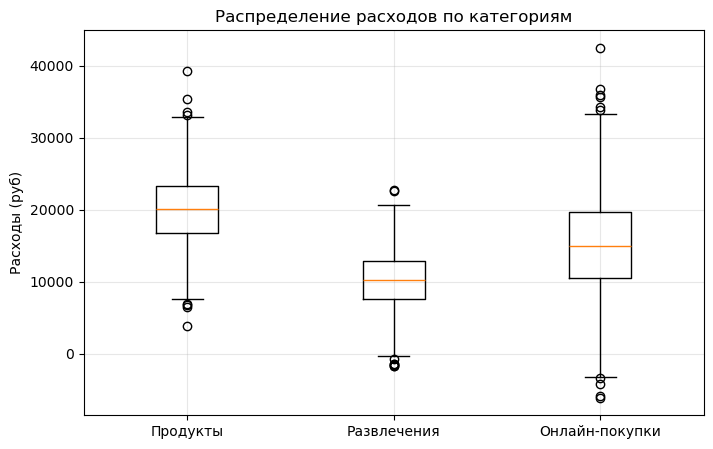

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot([goods, enter, on_sh], labels=['Продукты', 'Развлечения', 'Онлайн-покупки'])
plt.title('Распределение расходов по категориям')
plt.ylabel('Расходы (руб)')
plt.grid(True, alpha=0.3)
plt.show()

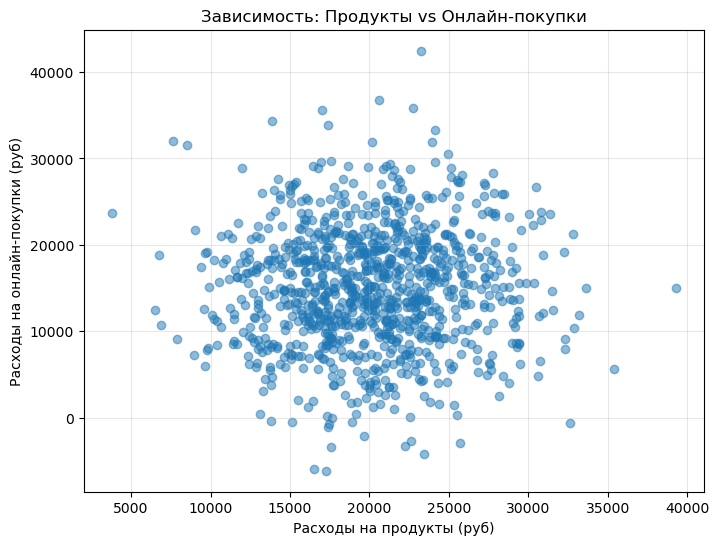

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(goods, on_sh, alpha=0.5)
plt.xlabel('Расходы на продукты (руб)')
plt.ylabel('Расходы на онлайн-покупки (руб)')
plt.title('Зависимость: Продукты vs Онлайн-покупки')
plt.grid(True, alpha=0.3)